## Understanding the Career of Data Scientists

This notebook contains the analytics for the ways to get started with as a software engineer. Stack Overflow is an online technology forum that has a large monthly active user base, using the survey results could find out the insights of the general software engineer community

**Import packages**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import os
%matplotlib inline

**Data Preparation**

Load stack overflow survey data from 2011 to 2018, store them in a dictionary

In [2]:
path = "./data/"
all_files = glob.glob(os.path.join(path, "*.csv")) 
survey_results = {}
year = '2011'

for file in all_files:
    # Getting the file name without extension
    file_name = os.path.splitext(os.path.basename(file))[0]
    year = file_name.split()[0]
    if year in ['2011', '2012']:
        survey_results[year] = pd.read_csv(path + file_name + '.csv', header = [0,1],engine='python',
                                           encoding= 'latin1')
    elif year in ['2013', '2014']:
        survey_results[year] = pd.read_csv(path + file_name + '.csv', header = [0,1],
                                    low_memory=False)

    elif year in ['2015']:
        survey_results[year] = pd.read_csv(path + file_name + '.csv', 
                                           skiprows= 1, low_memory=False)
    else:
        survey_results[year] = pd.read_csv(path + file_name + '.csv', 
                                           low_memory=False)
    

**Data Scientists Community Growth** 

Filter for data scientists

In [3]:
data_scientists = {year: survey_results[year][survey_results[year].filter(regex = '.*ccupation').iloc[:,0]
                                                                       .str.contains('.*ata|machine learning|algorithm', 
                                                                                     na=False)] 
                                                                       for year in [str(i) for i in np.arange(2011, 2017, 1)]}
for year in [str(i) for i in np.arange(2017, 2019, 1)]:
    data_scientists[year] = (survey_results[year][survey_results[year]
                                                    .filter(regex = '.*ev').iloc[:,0]
                                                     .str.contains('.*ata|achine|earning|lgorithm',  na=False)])

Plot % of data scientists. Missing data here is counted as 1 individual of data scientist, even though some of his/her information is not complete.

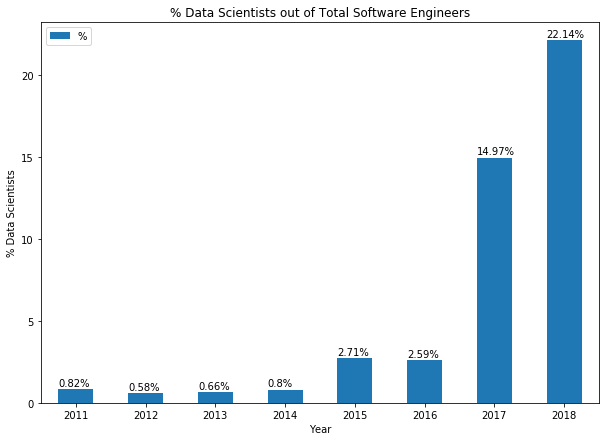

In [32]:
active_users = pd.DataFrame.from_dict({i: len(survey_results[i]) for i in survey_results},
                       orient='index', 
                       columns = ['User Count'])

active_data_scientists = pd.DataFrame.from_dict({i: len(data_scientists[i]) for i in data_scientists},
                       orient='index', 
                       columns = ['User Count'])


ax =(active_data_scientists/active_users * 100).plot.bar(figsize = (10, 7))

plt.xlabel('Year')
plt.ylabel('% Data Scientists')
plt.xticks(rotation = 0)
plt.legend("% data scientists")
plt.title("% Data Scientists out of Total Software Engineers")
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2))+ '%', (p.get_x(), p.get_height() + 0.2))
plt.show()

**Software Engineers Love Their Jobs**

Job satisfaction data over the years

In [5]:
satisfication = {}
satisfication['2011'] = data_scientists['2011'].iloc[:, -21]
satisfication['2012'] = data_scientists['2012'].iloc[:, -37]
satisfication['2013'] = data_scientists['2013'].iloc[:, -29]
satisfication['2015'] = data_scientists['2015']['Job Satisfaction']
satisfication['2016'] = data_scientists['2016']['job_satisfaction']
satisfication['2017'] = data_scientists['2017']['JobSatisfaction']
satisfication['2018'] = data_scientists['2018']['JobSatisfaction']

clear up messy formats. Missing data here are assumed to be individuals that are holds neutral outlooks on their career satisfactions, allowing more data points to be added to the total number of data scientists each year.

In [6]:
# Save Encoding Dictionary
cleanup_satisfaction = {}
cleanup_satisfaction['2011'] = {"I enjoy going to work": "Happy", 
                            "It pays the bills": "Neutral", 
                             "So happy it hurts": "Unhappy",
                             np.nan:"Neutral", 
                             "I'm not happy in my job": "Unhappy"
                             }

cleanup_satisfaction['2012'] = {"I enjoy going to work": "Happy", 
                             "I love my job": "Happy",
                            "Love my job":"Happy",
                            "Its a paycheck": "Neutral", 
                             "Hate my job": "Unhappy",
                             np.nan:"Neutral", 
                             "I'm not happy in my job": "Unhappy"
                             }

cleanup_satisfaction['2013'] = {"I enjoy going to work": "Happy", 
                             "Love my job": "Happy",
                            "It's a paycheck": "Neutral", 
                             "Hate my job": "Unhappy",
                              np.nan:"Neutral", 
                             "I'm not happy in my job": "Unhappy"
                             }

cleanup_satisfaction['2015'] = {"I'm somewhat satisfied with my job": "Happy", 
                              "I love my job": "Happy",
                              "I'm neither satisfied nor dissatisfied with my job": "Neutral", 
                              "Hate my job": "Unhappy",
                              np.nan:"Neutral", 
                              "I'm somewhat dissatisfied with my job": "Unhappy"
                             }

cleanup_satisfaction['2016'] = {"I'm somewhat satisfied with my job": "Happy", 
                              "I love my job": "Happy",
                              "I'm neither satisfied nor dissatisfied": "Neutral", 
                              "I hate my job": "Unhappy",
                               np.nan:"Neutral", 
                              "I'm somewhat dissatisfied with my job": "Unhappy"
                             }

cleanup_satisfaction['2018'] = {"Moderately satisfied": "Happy", 
                              "Extremely satisfied": "Happy",
                               "Slightly satisfied": "Happy",
                               "Neither satisfied nor dissatisfied": "Neutral", 
                               "Slightly dissatisfied": "Unhappy",
                                "Moderately dissatisfied": "Unhappy",
                                "Extremely dissatisfied": "Unhappy",
                                np.nan:"Neutral", 
                             }

In [7]:
for i in cleanup_satisfaction:
    satisfication[i] = satisfication[i].map(cleanup_satisfaction[i])
satisfication['2017'] = pd.cut(data_scientists['2017']['JobSatisfaction'], 
                               bins= 3, labels = ['Unhappy', 'Neutral', 'Happy'], include_lowest=True)

Perform a unique value count at each year exluding 2014 (Since 2014's survey does not have the career satisfaction question). 

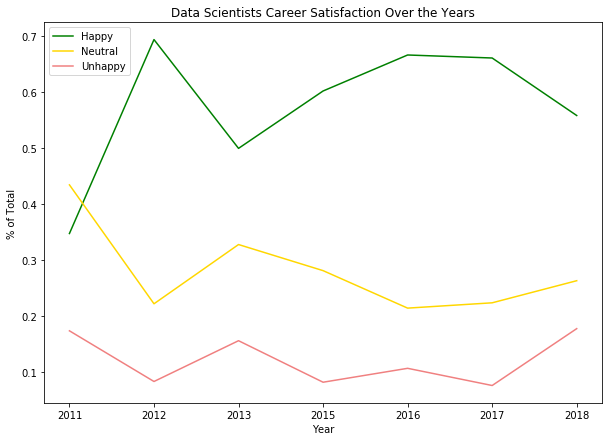

In [8]:
satisfication_counts = pd.DataFrame.from_dict({i: satisfication[i].value_counts()/len(satisfication[i])
                                               for i in satisfication})
colors = ['green', 'gold', 'lightcoral']
plt.figure(figsize = (10, 7))
j = 0
for i in list(satisfication_counts.T.columns):
    plt.plot(satisfication_counts.T.loc[:, i], label = i, color = colors[j])
    j += 1
plt.xlabel('Year')
plt.ylabel('% of Total')
plt.legend()
plt.title("Data Scientists Career Satisfaction Over the Years")
plt.show()

**Data Scientist Career Satisfaction vs. Other Software Engineers**

Again, missing data in career satisfaction column is treated as "No Opinion"

In [9]:
not_ds_2018 = (survey_results['2018'][~survey_results['2018']
                       .filter(regex = '.*ev').iloc[:,0].str.contains('.*ata',  na=False)])

Plot career satisfaction pie charts

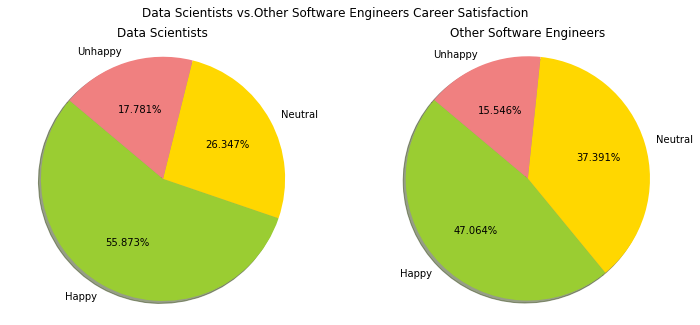

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
f.suptitle('Data Scientists vs.Other Software Engineers Career Satisfaction')
labels = 'Happy', 'Neutral', 'Unhappy'
sizes_ax1 = list(satisfication['2018'].value_counts())
sizes_ax2 = list(not_ds_2018['JobSatisfaction'].map(cleanup_satisfaction['2018']).value_counts())
colors = ['yellowgreen', 'gold', 'lightcoral']
ax1.pie(sizes_ax1, labels=labels, colors=colors,
        autopct='%1.3f%%', shadow=True, startangle=140)
ax1.axis('equal')
ax1.set_title('Data Scientists')

ax2.pie(sizes_ax2, labels=labels, colors=colors,
        autopct='%1.3f%%', shadow=True, startangle=140)
ax2.axis('equal')
ax2.set_title('Other Software Engineers')
plt.show()

**Trends in Programming Languages**

Get programming language counts from 2013 to 2018, using the following function. Missing data in programming languages are removed due to the fact that we are only interested in a select few most popular languages (sorted by number of users hoping to use beyond 2018) in the dataset. Removing those datapoints will not affect the result too much.

In [11]:
def getLanguage(df):
    
    """ Gets all the programming language counts for a certain dictionary of dataframes
        Input: dict
        Output: language merged dataframe
    """
    language = {}
    language['2013'] = pd.DataFrame(df['2013'].iloc[:, -72:-47]
                                    .apply(lambda x: x.count()).rename('2013'))
    language['2013'].index = language['2013'].reset_index()['level_1']
    language['2013'].index.name = None

    language['2014'] = pd.DataFrame(df['2014'].iloc[:, -78:-53]
                                    .apply(lambda x: x.count()).rename('2014'))
    language['2014'].index = language['2014'].reset_index()['level_1']
    language['2014'].index.name = None

    language['2015'] = pd.DataFrame(df['2015'].iloc[:, -214:-171]
                                    .apply(lambda x: x.count()).rename('2015'))
    language['2015'].index = (language['2015'].reset_index()['index']
                                     .apply(lambda x: x.replace(" ", "").split(':')[1]))

    language['2016'] = pd.DataFrame(df['2016']['tech_do'].str.replace(" ", "").str
                                    .split(";", expand=True)
                                    .stack().reset_index(drop=True, level=1)
                                    .value_counts().rename('2016'))  

    language['2017'] = pd.DataFrame(df['2017']['HaveWorkedLanguage'].str.replace(" ", "").str
                                    .split(";", expand=True)
                                    .stack().reset_index(drop=True, level=1)
                                    .value_counts().rename('2017'))

    language['2018'] = pd.DataFrame(df['2018']['LanguageWorkedWith'].str.replace(" ", "").str
                                    .split(";", expand=True)
                                    .stack().reset_index(drop=True, level=1)
                                    .value_counts().rename('2018'))

    language['2018 Beyond'] = pd.DataFrame(df['2018']['LanguageDesireNextYear'].str.replace(" ", "")
                                           .str.split(";", expand=True)
                                           .stack().reset_index(drop=True, level=1)
                                           .value_counts().rename('2018 Beyond'))
    
    # Join all the value counts into 1 dataframe, keeping all the entries
    language_merge = pd.DataFrame()
    for i in language:
        try:
            language_merge = pd.merge(language_merge.reset_index(), language[i].reset_index(), how = 'outer')
        except:
            language_merge = pd.merge(language_merge, language[i].reset_index(), how = 'outer')
    language_merge.drop('level_0', inplace = True, axis = 1)
    language_merge.set_index('index', inplace=True)
    
    return language_merge

In [12]:
language_merge = getLanguage(survey_results)
language_merge_ds = getLanguage(data_scientists)

Visualize trends of each language over the years

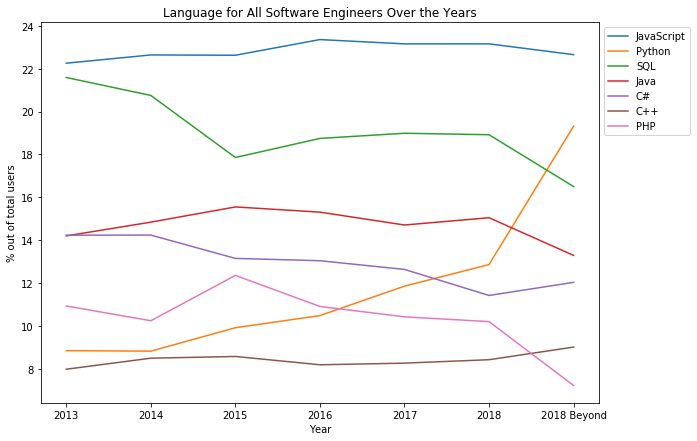

In [13]:
language_merge = language_merge.dropna().loc[language_merge.dropna().sort_values(ascending = False, 
                                                                                 by = '2018 Beyond').head(7).index]
language_merge_ds = language_merge_ds.dropna().loc[language_merge_ds.dropna().sort_values(ascending = False, 
                                                                                 by = '2018 Beyond').head(7).index]

plt.figure(figsize = (10, 7))
for i in list(language_merge.dropna().T.columns):
    plt.plot((language_merge/language_merge.sum() *100).T.loc[:, i], label = i)
plt.xlabel('Year')
plt.ylabel('% out of total users')
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Language for All Software Engineers Over the Years")
plt.show()

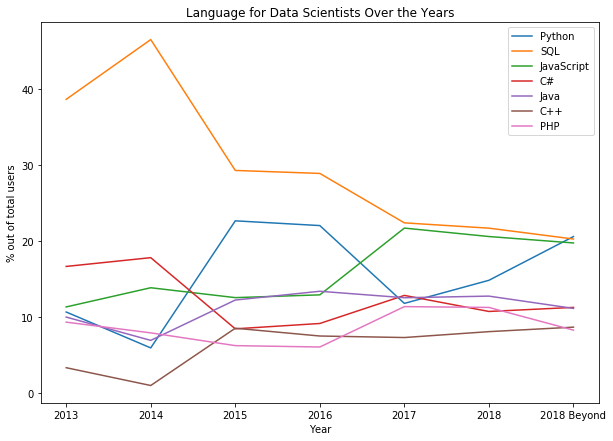

In [14]:
plt.figure(figsize = (10, 7))
for i in list(language_merge_ds.dropna().T.columns):
    plt.plot((language_merge_ds/language_merge_ds.sum()* 100).T.loc[:, i], label = i)
plt.xlabel('Year')
plt.ylabel('% out of total users')
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Language for Data Scientists Over the Years")
plt.show()

**Salary vs. Software Engineers**

On average, missing data are removed since they provided very little value to the mean

In [15]:
ds_salary = data_scientists['2018']['ConvertedSalary'].mean()
not_ds_salary = not_ds_2018['ConvertedSalary'].mean()

Plot pie chart

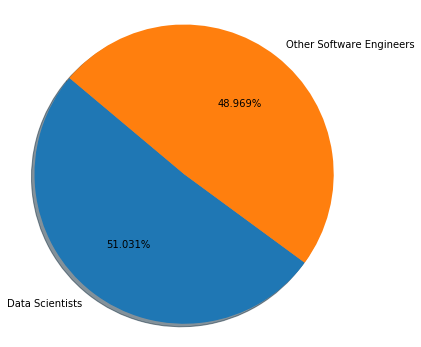

In [16]:
labels = 'Data Scientists', 'Other Software Engineers'
sizes = [ds_salary, not_ds_salary]
colors = ['C0', 'C1']
plt.figure(figsize = (6, 6))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.3f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

By Country, missing data are again removed since they will not be evaluated in the graph below

In [17]:
ds_salary = data_scientists['2018'].groupby('Country').mean()['ConvertedSalary'].rename('data scientist salary')
not_ds_salary = not_ds_2018.groupby('Country').mean()['ConvertedSalary'].rename('not data scientist salary')

Now select 7 countries to compare

In [18]:
countries = ['China', 'Japan', 'United States', 'Canada', 
             'United Kingdom', 'Germany',  'Australia', 'South Africa']
salary_comarison = pd.DataFrame(ds_salary[countries]).join(pd.DataFrame(not_ds_salary[countries]))

Plot salary comparisons

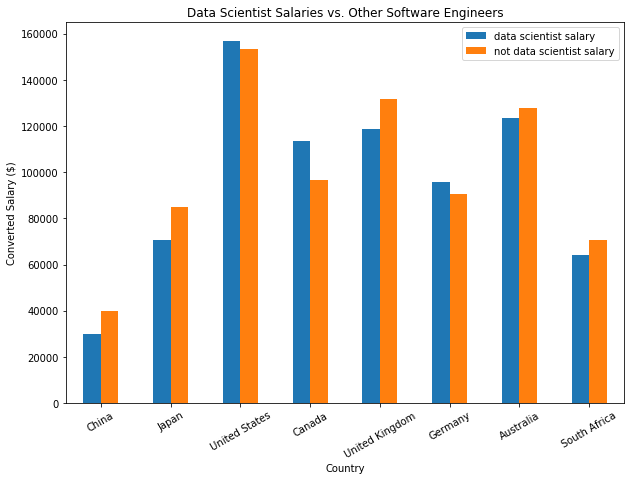

In [19]:
salary_comarison.plot(kind = 'bar', figsize = (10, 7),
                      title = 'Data Scientist Salaries vs. Other Software Engineers')
plt.xticks(rotation = 30)
plt.ylabel('Converted Salary ($)')
plt.show()

**Data Scientists Learning Curves**

Find the fully productive time interval counts for data scientist and other software engineers

In [20]:
ds_prod = data_scientists['2018']['TimeFullyProductive'].value_counts().rename('data scientists')
no_ds_prod = not_ds_2018['TimeFullyProductive'].value_counts().rename('other software engineers')

Plot data scientists learning curves

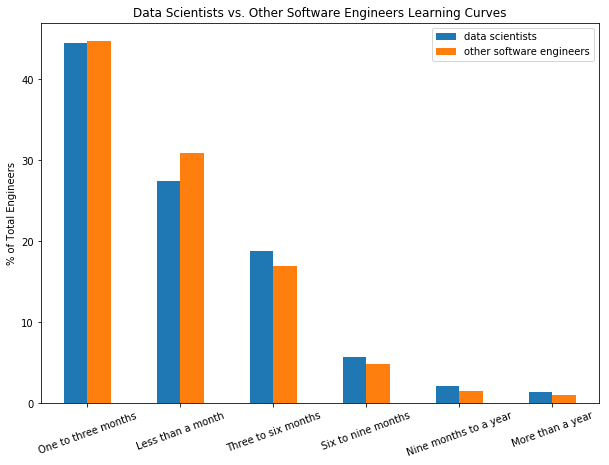

In [21]:
pd.DataFrame(ds_prod/sum(ds_prod)*100).join(pd.DataFrame(no_ds_prod/sum(no_ds_prod)*100)).plot(kind = 'bar',
                                                    figsize = (10, 7),
                                                    title = 'Data Scientists vs. Other Software Engineers Learning Curves')
plt.xticks(rotation = 20)
plt.ylabel('% of Total Engineers')
plt.show()

**Data Scientists Hours Spent on Computer **

In [22]:
ds_computer = data_scientists['2018']['HoursComputer'].value_counts().rename('data scientists')
no_ds_computer = not_ds_2018['HoursComputer'].value_counts().rename('other software engineers')

Plot data scientists hours spent on Computer

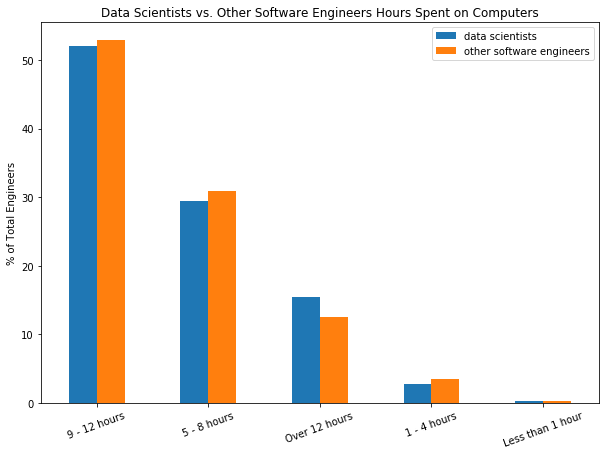

In [31]:
pd.DataFrame(ds_computer/sum(ds_computer)*100).join(pd.DataFrame(no_ds_computer/sum(no_ds_computer)*100)).plot(kind = 'bar',
                                                figsize = (10, 7),
                                                title = 'Data Scientists vs. Other Software Engineers Hours Spent on Computers')
plt.xticks(rotation = 20)
plt.ylabel('% of Total Engineers')
plt.show()

**Data Scientists Meals Skipped**

In [24]:
ds_meals = data_scientists['2018']['SkipMeals'].value_counts().rename('data scientists')
no_ds_meals = not_ds_2018['SkipMeals'].value_counts().rename('other software engineers')

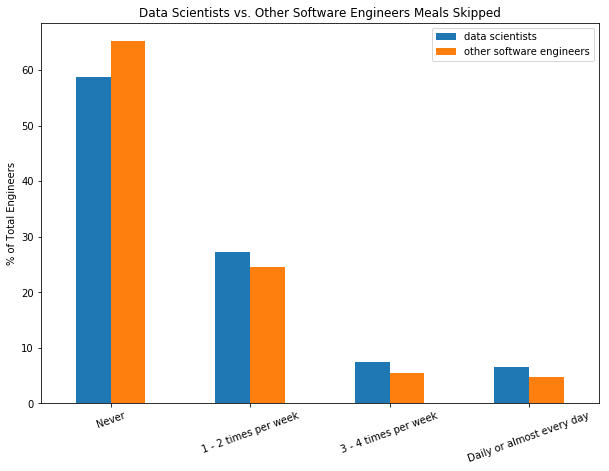

In [25]:
pd.DataFrame(ds_meals/sum(ds_meals)*100).join(pd.DataFrame(no_ds_meals/sum(no_ds_meals)*100)).plot(kind = 'bar',
                                                         figsize = (10, 7),
                                                         title = 'Data Scientists vs. Other Software Engineers Meals Skipped')
plt.xticks(rotation = 20)
plt.ylabel('% of Total Engineers')
plt.show()

**Artificial Intelligence Sentiment**

Find the AI sentiments for both data scientists and other software engineers

In [26]:
AI_sentiments_ds = (data_scientists['2018'].filter(regex = 'AI')
                 .join(data_scientists['2018'][['Age', 'FormalEducation','UndergradMajor', 'DevType']])).sort_values('Age')
AI_sentiments_nds = (not_ds_2018.filter(regex = 'AI')
                 .join(not_ds_2018[['Age', 'FormalEducation','UndergradMajor', 'DevType']])).sort_values('Age')

Sentiment About AI by different Age Group

In [27]:
pd.options.mode.chained_assignment = None
sentiment_map = {"I'm worried about the dangers more than I'm excited about the possibilities.": 'Worried',
                         "I'm excited about the possibilities more than worried about the dangers.": "Excited",
                         "I don't care about it, or I haven't thought about it.": "No Opinion"
                        }
AI_sentiments_Future_ds = AI_sentiments_ds.dropna(subset=['AIFuture'])
AI_sentiments_Future_ds.loc[:, 'AIFuture'] = (AI_sentiments_Future_ds['AIFuture']
                        .map(sentiment_map))
AI_sentiments_Future_nds = AI_sentiments_nds.dropna(subset=['AIFuture'])
AI_sentiments_Future_nds.loc[:, 'AIFuture'] = (AI_sentiments_Future_nds['AIFuture']
                        .map(sentiment_map))

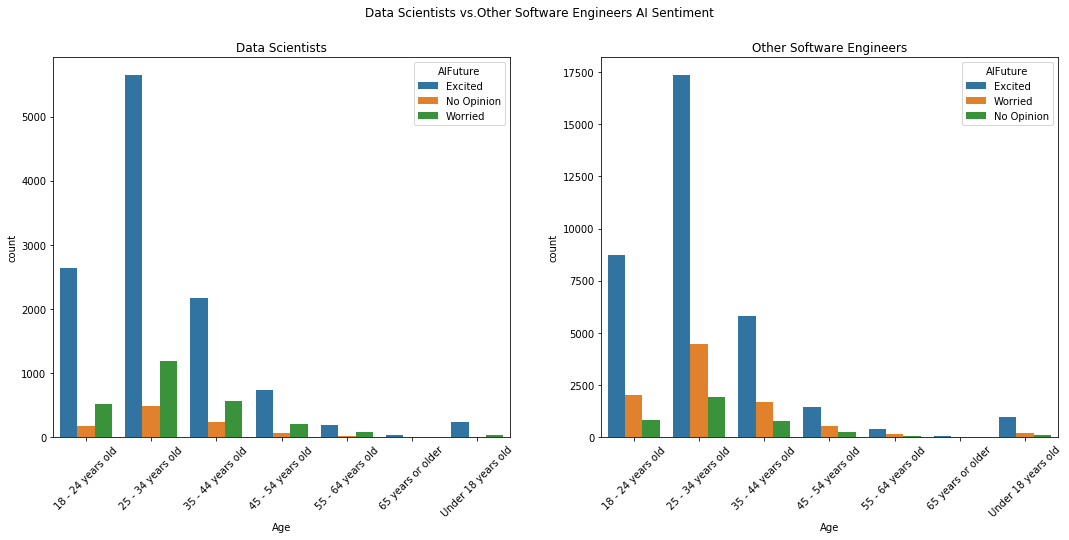

In [28]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,7))
f.suptitle('Data Scientists vs.Other Software Engineers AI Sentiment')
sns.countplot(x = 'Age', hue="AIFuture", data = AI_sentiments_Future_ds, ax = ax1)
ax1.set_title('Data Scientists')
sns.countplot(x = 'Age', hue="AIFuture", data = AI_sentiments_Future_nds, ax = ax2)
ax2.set_title('Other Software Engineers')
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
for tick in ax2.get_xticklabels():
    tick.set_rotation(45)

**Open Source Contributions**

In [35]:
ds_contributions = (data_scientists['2018']['OpenSource'].value_counts()
                    /data_scientists['2018']['OpenSource'].value_counts().sum())
nds_contributions = (not_ds_2018['OpenSource'].value_counts()/not_ds_2018['OpenSource'].value_counts().sum())

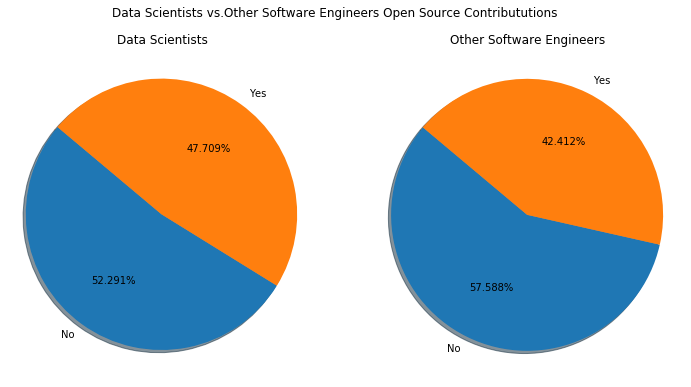

In [39]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
f.suptitle('Data Scientists vs.Other Software Engineers Open Source Contribututions')
labels = 'No', 'Yes'
sizes_ax1 = list(ds_contributions)
sizes_ax2 = list(nds_contributions)
ax1.pie(sizes_ax1, labels=labels, colors=colors,
        autopct='%1.3f%%', shadow=True, startangle=140)
ax1.axis('equal')
ax1.set_title('Data Scientists')

ax2.pie(sizes_ax2, labels=labels, colors=colors,
        autopct='%1.3f%%', shadow=True, startangle=140)
ax2.axis('equal')
ax2.set_title('Other Software Engineers')
plt.show()